Este é um pequeno projeto afim de estudos, que utiliza um dataset de economia de adultos dos EUA, e faço algumas simples análises.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

In [ ]:
#importando e tratando os dados
base_df = pd.read_csv('data\\adult11.csv')

# Renomear colunas para português
base_df = base_df.rename(columns={
    'fnlwgt': 'PesoFinal',
    'education': 'Educacao',
    'salary': 'Salario',
    'occupation': 'Ocupacao',
    'hours-per-week': 'HorasSemana',
    'gender': 'Genero'
})

base_df['Genero'] = base_df['Genero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})


# Filtrar registros válidos
base_df = base_df[base_df['Ocupacao'] != '?'].reset_index(drop=True)
base_df = base_df[base_df['HorasSemana'] > 0]

base_df

,age,workclass,PesoFinal,Educacao,education-num,marital-status,Ocupacao,relationship,race,Genero,capital-gain,capital-loss,HorasSemana,native-country,Salario
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Masculino,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Masculino,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Masculino,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Masculino,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Masculino,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Feminino,0,0,38,United-States,<=50K
46029,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Masculino,0,0,40,United-States,>50K
46030,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Feminino,0,0,40,United-States,<=50K
46031,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Masculino,0,0,20,United-States,<=50K


Classificando Classe monetária e agrupando

In [ ]:
df_estudo1 = base_df[['PesoFinal', 'Educacao', 'Salario']].copy()

# Classificando baseado no salário
base_df['ClasseMonetaria'] = base_df['Salario'].replace({'>50K': 'Alta', '<=50K': 'Baixa'})

# Agrupar e somar amostras
df_estudo1 = base_df.groupby(['Educacao', 'ClasseMonetaria'], as_index=False)['PesoFinal'] \
                       .sum() \
                       .rename(columns={'PesoFinal': 'Amostra'})


,Educacao,ClasseMonetaria,Amostra
0,10th,Alta,16412727
1,10th,Baixa,227980979
2,11th,Alta,15602228
3,11th,Baixa,301922205
4,12th,Alta,9787892
5,12th,Baixa,109810146
6,1st-4th,Alta,1501918
7,1st-4th,Baixa,53265130
8,5th-6th,Alta,4111436
9,5th-6th,Baixa,103809922


Gráfico exibindo a relação entre nível de educação e classe monetária na população da amostra.

Podemos observar que a maior parte da população somente completou o ensino médio

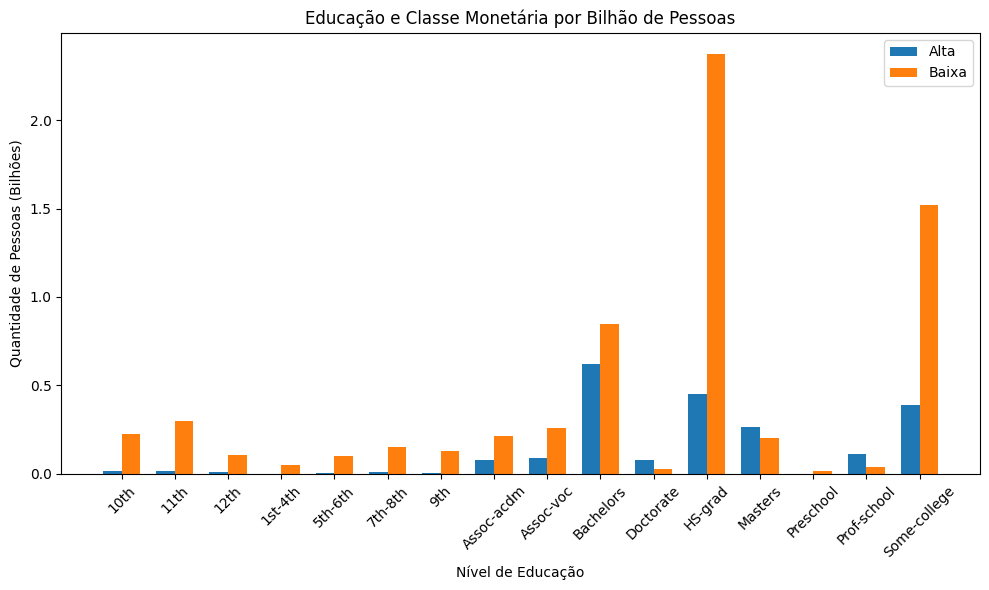

In [19]:
## Exibição de gráfico exibindo a quantidade de pessoas e a distribuição do nível de escolaridade, de classe monetária alta e baixa


# Dividir por 1 bilhão para melhor visualização
df_estudo1['Amostra'] = df_estudo1['Amostra'].astype(float) / 1e9

# Pivot para gráfico
df_plot = df_estudo1.pivot(index='Educacao', columns='ClasseMonetaria', values='Amostra')

# Plot gráfico de barras
largura_barra = 0.35
indices = np.arange(len(df_plot))

plt.figure(figsize=(10,6))
plt.bar(indices, df_plot['Alta'], largura_barra, label='Alta')
plt.bar(indices + largura_barra, df_plot['Baixa'], largura_barra, label='Baixa')

plt.xlabel('Nível de Educação')
plt.ylabel('Quantidade de Pessoas (Bilhões)')
plt.title('Educação e Classe Monetária por Bilhão de Pessoas')
plt.xticks(indices + largura_barra / 2, df_plot.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Aqui é vista em um gráfico de barras empilhado, a razão das porcentagens das classes monetárias em cada nível de educação

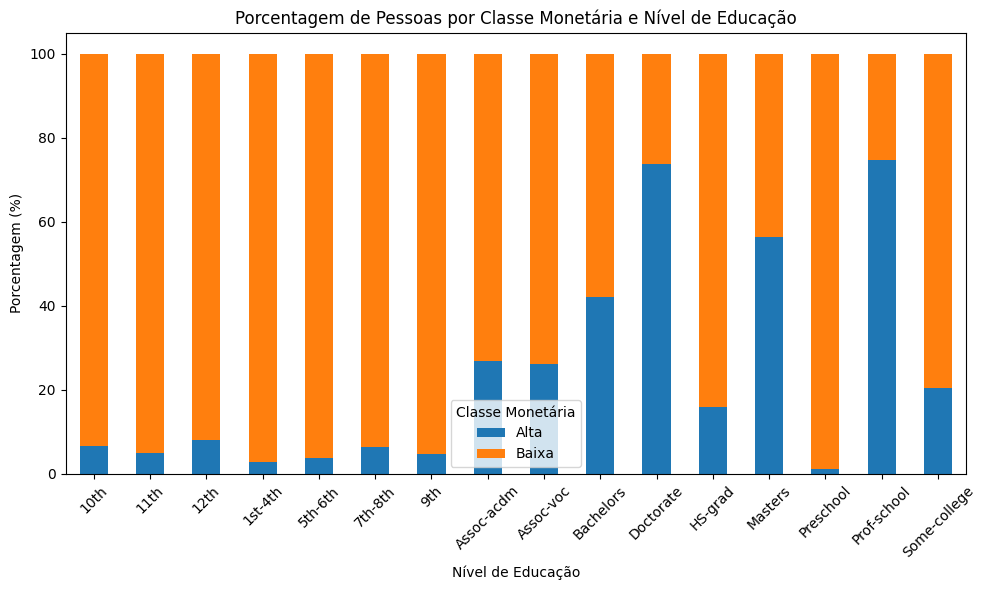

In [20]:
## Plotando um gráfico que exibe a razão entre a educação e classe salarial

df_percentual = df_plot.div(df_plot.sum(axis=1), axis=0) * 100

df_percentual.plot(kind='bar', stacked=True, figsize=(10,6), color=['#1f77b4', '#ff7f0e'])


plt.ylabel('Porcentagem (%)')
plt.xlabel('Nível de Educação')
plt.title('Porcentagem de Pessoas por Classe Monetária e Nível de Educação')
plt.legend(title='Classe Monetária')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Para fins de estudo, vamos imaginar que foi pedido pelo seu chefe, os trabalhos mais populares e menos populares entre os gêneros, para que a empresa faça um marketing mais focado.

In [22]:
df_estudo2 = base_df[['Genero','Ocupacao','PesoFinal']].copy()

# Agrupar e ordenar
df_estudo2 = df_estudo2.groupby(['Genero','Ocupacao'], as_index=False)['PesoFinal'] \
                       .sum() \
                       .sort_values(by='PesoFinal', ascending=False) \
                       .reset_index(drop=True)

# Renomear coluna
df_estudo2 = df_estudo2.rename(columns={'PesoFinal': 'Quantidade'})

# Totais para cálculo de porcentagens
total_pessoas = df_estudo2['Quantidade'].sum()
total_masculino = df_estudo2.loc[df_estudo2['Genero'] == 'Masculino', 'Quantidade'].sum()
total_feminino = df_estudo2.loc[df_estudo2['Genero'] == 'Feminino', 'Quantidade'].sum()

# Top 3 e Bottom 3 ocupações por gênero
df_top_homens = df_estudo2[df_estudo2['Genero'] == 'Masculino'].drop(columns='Genero').head(3)
df_top_homens['Porcentagem_Total'] = ((df_top_homens['Quantidade'] / total_pessoas) * 100).round(5)
df_top_homens['Porcentagem_Genero'] = ((df_top_homens['Quantidade'] / total_masculino) * 100).round(5)

df_bottom_homens = df_estudo2[df_estudo2['Genero'] == 'Masculino'].drop(columns='Genero').tail(3)
df_bottom_homens['Porcentagem_Total'] = ((df_bottom_homens['Quantidade'] / total_pessoas) * 100).round(5)
df_bottom_homens['Porcentagem_Genero'] = ((df_bottom_homens['Quantidade'] / total_masculino) * 100).round(5)

df_top_mulheres = df_estudo2[df_estudo2['Genero'] == 'Feminino'].drop(columns='Genero').head(3)
df_top_mulheres['Porcentagem_Total'] = ((df_top_mulheres['Quantidade'] / total_pessoas) * 100).round(5)
df_top_mulheres['Porcentagem_Genero'] = ((df_top_mulheres['Quantidade'] / total_feminino) * 100).round(5)

df_bottom_mulheres = df_estudo2[df_estudo2['Genero'] == 'Feminino'].drop(columns='Genero').tail(3)
df_bottom_mulheres['Porcentagem_Total'] = ((df_bottom_mulheres['Quantidade'] / total_pessoas) * 100).round(5)
df_bottom_mulheres['Porcentagem_Genero'] = ((df_bottom_mulheres['Quantidade'] / total_feminino) * 100).round(5)

# Exibir resultados
print("Mais populares entre homens")
display(df_top_homens)
print("Menos populares entre homens")
display(df_bottom_homens)
print("Mais populares entre mulheres")
display(df_top_mulheres)
print("Menos populares entre mulheres")
display(df_bottom_mulheres)

Mais populares entre homens


,Ocupacao,Quantidade,Porcentagem_Total,Porcentagem_Genero
0,Craft-repair,1114029728,12.75028,18.65886
1,Exec-managerial,811516298,9.28795,13.59207
2,Prof-specialty,743235966,8.50647,12.44844


Menos populares entre homens


,Ocupacao,Quantidade,Porcentagem_Total,Porcentagem_Genero
16,Tech-support,167672004,1.91904,2.80833
25,Armed-Forces,3254589,0.03725,0.05451
26,Priv-house-serv,2502142,0.02864,0.04191


Mais populares entre mulheres


,Ocupacao,Quantidade,Porcentagem_Total,Porcentagem_Genero
3,Adm-clerical,711312104,8.14110,25.70897
5,Other-service,484540849,5.54566,17.51277
9,Prof-specialty,401398658,4.59408,14.50776


Menos populares entre mulheres


,Ocupacao,Quantidade,Porcentagem_Total,Porcentagem_Genero
22,Protective-serv,25254759,0.28905,0.91278
23,Transport-moving,24808137,0.28393,0.89664
24,Farming-fishing,17562082,0.20100,0.63475


Classificando as horas de trabalho por semana, de cada nível de escolaridade

In [24]:
df_estudo3 = base_df.groupby(['Educacao','HorasSemana'], as_index=False)['PesoFinal'] \
                    .sum() \
                    .reset_index(drop=True) \
                    .rename(columns={'PesoFinal': 'Quantidade'})

# Total por educação
df_estudo3['Total_Educacao'] = df_estudo3.groupby('Educacao')['Quantidade'].transform('sum')

# Porcentagem
df_estudo3['Porcentagem'] = (df_estudo3['Quantidade'] / df_estudo3['Total_Educacao']) * 100

# Categorizar horas por intervalos de 10 horas
intervalos = range(0, 101, 10)
labels_intervalos = [f"{i+1}-{i+10}" for i in intervalos[:-1]]

df_estudo3['HorasSemana'] = pd.cut(df_estudo3['HorasSemana'], bins=intervalos, labels=labels_intervalos, right=True, include_lowest=True)

# Agrupar novamente por educação e intervalo de horas
df_estudo3_final = df_estudo3.groupby(['Educacao','HorasSemana'], as_index=False)['Porcentagem'].sum()

df_estudo3_final

C:\Users\Juliano\AppData\Local\Temp\ipykernel_11976\4224896669.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_estudo3_final = df_estudo3.groupby(['Educacao','HorasSemana'], as_index=False)['Porcentagem'].sum()


,Educacao,HorasSemana,Porcentagem
0,10th,1-10,3.366858
1,10th,11-20,10.309635
2,10th,21-30,9.891291
3,10th,31-40,59.254194
4,10th,41-50,9.885615
...,...,...,...
155,Some-college,51-60,6.874755
156,Some-college,61-70,1.691654
157,Some-college,71-80,0.807606
158,Some-college,81-90,0.193591


Estamos vendo em % a distribuição das horas de trabalho, entre os níveis de educação.

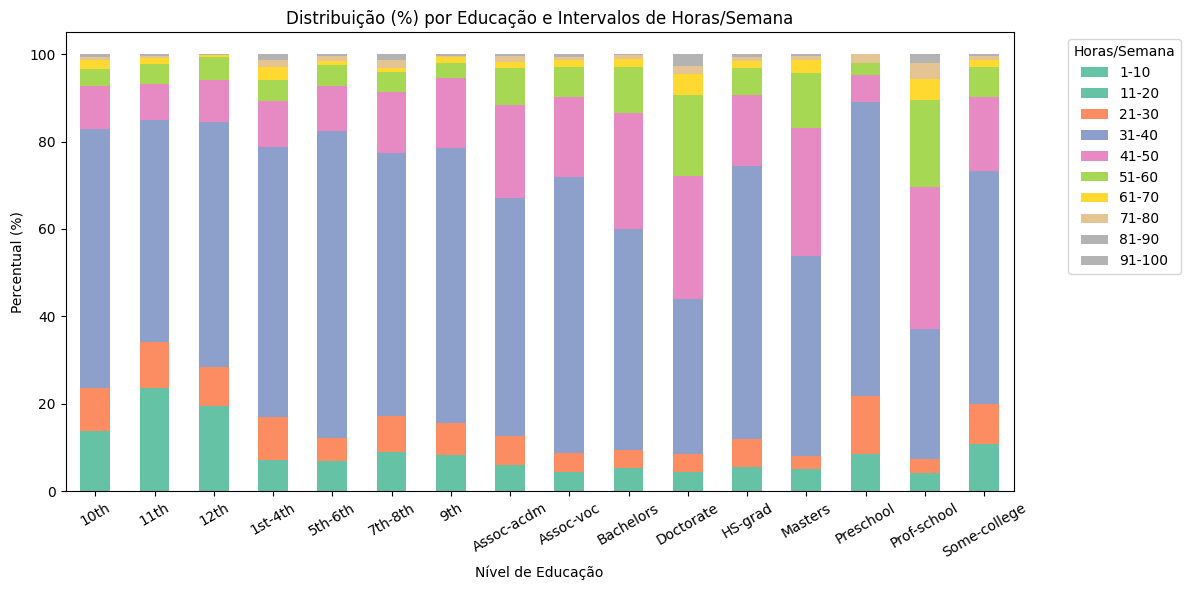

In [30]:
# Pivot para formato adequado para barras empilhadas
df_empilhado = df_estudo3_final.pivot(index='Educacao', columns='HorasSemana', values='Porcentagem').fillna(0)

# Plot gráfico de barras empilhadas
df_empilhado.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='Set2'
)

plt.title('Distribuição (%) por Educação e Intervalos de Horas/Semana')
plt.xlabel('Nível de Educação')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=30)
plt.legend(title='Horas/Semana', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()